# Principal Component Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
def combine_city_data(city_code, dfs, names):
    """
    Generate a single DataFrame with data from all years for one city.
    """
    data_rows = [df.loc[city_code] for df in dfs]
    all_data = pd.concat(data_rows, axis=1)
    all_data.columns = names
    all_data.index.name = 'Year'
    return all_data
    

def import_training_data(filename):
    return pd.read_csv('../data/train/%s' % filename, index_col='UACE Code', dtype={'UACE Code': str})

city_info = pd.read_csv('../data/Cities.csv', index_col='UACE Code', dtype={'UACE Code': str})

def get_city_code(name):
    return city_info[city_info['Primary UZA Name'] == name].index[0]

def get_city_name(code):
    return city_info.loc[code]['Primary UZA Name'].iloc[0]

In [37]:
city = get_city_code('Columbus, OH')
select_features = [
    'VRM_percap',
    'TotalFund_infladj_percap', 
    'FedFund_frac', 
    'StateFund_frac', 
    'LocalFund_frac', 
    'OpFund_frac', 
    'OpExp_GA_frac', 
    'OpExp_VM_frac', 
    'OpExp_VO_frac'
]
xdfs = [import_training_data('%s.csv' % name) for name in select_features]
city_xvals = combine_city_data(city, xdfs, select_features)
X = city_xvals.values
city_xvals

,VRM_percap,TotalFund_infladj_percap,FedFund_frac,StateFund_frac,LocalFund_frac,OpFund_frac,OpExp_GA_frac,OpExp_VM_frac,OpExp_VO_frac
Year,,,,,,,,,
1991,9.210416,116.819420,0.230284,0.085961,0.446907,0.806640,0.182897,0.182511,0.566497
1992,9.054159,92.092770,0.139923,0.078651,0.502238,0.933031,0.197521,0.180222,0.550496
1993,8.575510,113.139425,0.288940,0.082453,0.431580,0.724474,0.218185,0.173303,0.539229
1994,8.738745,91.533255,0.148276,0.074298,0.540709,0.943976,0.219308,0.165901,0.542392
1995,8.662434,119.679351,0.292206,0.056052,0.471754,0.699908,0.218133,0.165503,0.539051
1996,8.729915,80.431953,0.092426,0.069070,0.558125,0.935067,0.169527,0.171426,0.587497
1997,8.671336,79.893160,0.109372,0.065778,0.545386,0.943583,0.220038,0.160926,0.547547
1998,8.873105,81.415496,0.093410,0.065184,0.524675,0.926409,0.177474,0.174900,0.569636
1999,9.204693,102.268418,0.259504,0.057178,0.468500,0.797447,0.210669,0.162419,0.549234


In [38]:
pca_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('PCA', PCA(n_components=2))
])

pca_pipe.fit(X)

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=2))])

In [39]:
pca_pipe['PCA'].components_

array([[ 0.29706189,  0.09857402, -0.31152609, -0.45553442,  0.52162904,
        -0.09171648, -0.3279339 , -0.07316225,  0.45174679],
       [ 0.32923408,  0.57260915,  0.33137621, -0.1134617 , -0.00146297,
        -0.50458   ,  0.27540238, -0.28335811, -0.17406471]])

In [40]:
pca_pipe['PCA'].explained_variance_

array([3.13140116, 2.52699725])

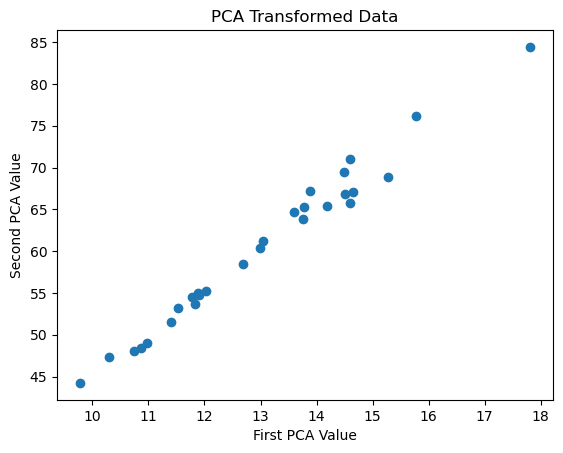

In [41]:
fit = pca_pipe['PCA'].transform(X)

fig, ax = plt.subplots()
ax.scatter(fit[:,0], fit[:,1])
ax.set_xlabel('First PCA Value')
ax.set_ylabel('Second PCA Value')
ax.set_title('PCA Transformed Data')
plt.show()